# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [35]:
import statistics
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def variance(numbers):
  length = len(numbers)
  sum = 0
  counter =0
  for x in numbers:
    sum = sum + numbers[counter] 
    counter = counter +1
  mean = sum/length
  sum = 0
  counter =0    
  for y in numbers:    
    temp = 0
    temp = numbers[counter] - mean
    sum = sum + (temp*temp)
    counter = counter +1
  return(sum/(length-1))


x = statistics.mean(sales) 
# Printing the mean 
print("Mean is :", x) 
print("My variance is % s" %(variance(sales)))
print("Variance using function is % s" %(statistics.variance(sales))) 
print("Standard Deviation is % s" %(math.sqrt(statistics.variance(sales))))
print("Standard Deviation using function is % s " % (statistics.stdev(sales))) 



Mean is : 3052.714285714286
My variance is 214387.90476190473
Variance using function is 214387.90476190476
Standard Deviation is 463.02041505953576
Standard Deviation using function is 463.02041505953576 


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [38]:
import numpy as np

customers = [127, 80, 105, 92, 120, 115, 93]
cov_mat = np.stack((sales, customers), axis = 1)  
  
print(np.cov(cov_mat)) 


[[5705442.  3918480.  4935258.  4570434.  6046620.  5295015.  4384644. ]
 [3918480.  2691200.  3389520.  3138960.  4152800.  3636600.  3011360. ]
 [4935258.  3389520.  4269042.  3953466.  5230380.  4580235.  3792756. ]
 [4570434.  3138960.  3953466.  3661218.  4843740.  4241655.  3512388. ]
 [6046620.  4152800.  5230380.  4843740.  6408200.  5611650.  4646840. ]
 [5295015.  3636600.  4580235.  4241655.  5611650.  4914112.5 4069230. ]
 [4384644.  3011360.  3792756.  3512388.  4646840.  4069230.  3369608. ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [47]:
std_dev_customers = statistics.stdev(customers)
std_dev_sales = statistics.stdev(sales)

r = np.cov(sales, customers, ddof=1)/(std_dev_customers*std_dev_sales)
print(r)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [93]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
age = df['age']
fare = df['fare']


In [97]:
age.fillna(value=0, inplace=True)
fare.fillna(value=0, inplace=True)

cov_mat = np.stack((age, fare), axis = 1)  
  
print(np.cov(cov_mat)) 


[[16623.48195312 13733.04966938 13634.2865625  ... -1802.86203125
  -1925.93984375 -2724.22568208]
 [13733.04966938 11345.19553444 11263.6050075  ... -1489.38675375
  -1591.06423125 -2250.54694968]
 [13634.2865625  11263.6050075  11182.60125    ... -1478.675625
  -1579.621875   -2234.36183317]
 ...
 [-1802.86203125 -1489.38675375 -1478.675625   ...   195.5253125
    208.8734375    295.44971749]
 [-1925.93984375 -1591.06423125 -1579.621875   ...   208.8734375
    223.1328125    315.61948329]
 [-2724.22568208 -2250.54694968 -2234.36183317 ...   295.44971749
    315.61948329   446.44109987]]


In [99]:
std_dev_age = statistics.stdev(age)
std_dev_fare = statistics.stdev(fare)

r = np.cov(age, fare, ddof=1)/(std_dev_age*std_dev_fare)
print(r)

[[0.24892554 0.17029744]
 [0.17029744 4.01726562]]


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

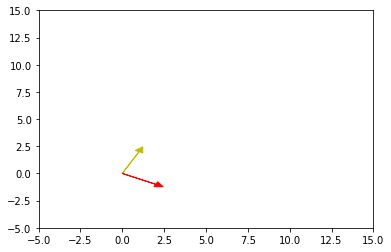

0


In [107]:
import matplotlib.pyplot as plt

a = [1, 2] 
b = [2, -1]

plt.arrow(0, 0, a[0], a[1], head_width=.5, head_length=0.5, color = 'y')
plt.arrow(0, 0, b[0], b[1], head_width=.5, head_length=0.5, color = 'r')
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()

print(np.dot(a,b))

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [111]:
a=[-5,3,7]
b=[6,-8,2]

if np.dot(a,b) == 0:
  print('They are orthogonal')
else: print('they are not orthogonal')

they are not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [118]:
from numpy import linalg as LA

c=[2, -15, 6, 20]

print(np.dot(c,c))
print(np.matmul(np.transpose(c), c))
print(LA.norm(c)*LA.norm(c))

665
665
665.0


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}




## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [121]:
f = [4, 12, 11, 9, 2]

f_norm = LA.norm(f)

print(np.true_divide(f, f_norm))

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

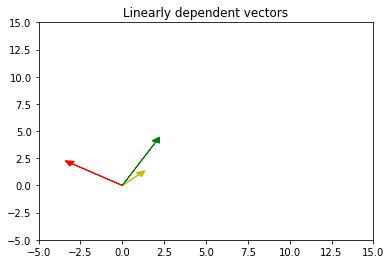

-1


In [134]:
a = [1, 1] 
b = [-3, 2]
c = [2,4]



plt.title('Linearly dependent vectors')
plt.arrow(0, 0, a[0], a[1], head_width=.5, head_length=0.5, color = 'y')
plt.arrow(0, 0, b[0], b[1], head_width=.5, head_length=0.5, color = 'r')
plt.arrow(0, 0, c[0], c[1], head_width=.5, head_length=0.5, color = 'g')

plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()

print(np.dot(a,b))

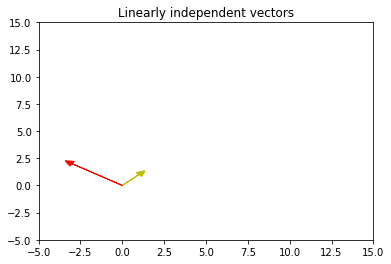

-1


In [136]:
a = [1, 1] 
b = [-3, 2]


plt.title('Linearly independent vectors')
plt.arrow(0, 0, a[0], a[1], head_width=.5, head_length=0.5, color = 'y')
plt.arrow(0, 0, b[0], b[1], head_width=.5, head_length=0.5, color = 'r')

plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()


print(np.dot(a,b))

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

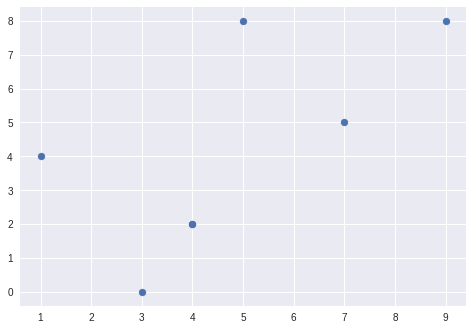

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()